## Part 0. Data Preparation
The dataset is split into a training and a testing set where there are 180 images per class for training and validation; and 20 images for testing.

In this section:
<ul>
<li>Download the dataset </li>
<li>Visualize five images from the dataset.</li>
</ul>


https://www.tensorflow.org/tutorials/images/cnn

In [ ]:
pip install Augmentor


Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip3 install graphviz 

In [ ]:
!pip3 install pydot 


In [ ]:
pip install split-folders


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install livelossplot

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import splitfolders
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model , Sequential
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
from PIL import ImageFont
import visualkeras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from keras.applications import VGG16
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , classification_report
import seaborn as sns
from sklearn.metrics import accuracy_score
from keras.layers import BatchNormalization
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import mean_squared_error

import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

In [ ]:
batch_size = 28
img_height = 128
img_width = 128

train_1 = tf.keras.preprocessing.image_dataset_from_directory(
  'cvc_3/training/',
  validation_split=0.2,
    color_mode = 'rgb',
  subset="training",
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size,seed =42)

valid_1 = tf.keras.preprocessing.image_dataset_from_directory(
    'cvc_3/training/' ,
    validation_split=0.2,
    color_mode = 'rgb',
    subset="validation",
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size,seed=42)
test_1 = tf.keras.preprocessing.image_dataset_from_directory(
    'cvc_3/testing/' ,
    color_mode = 'rgb',
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size,seed=42)

Found 900 files belonging to 5 classes.
Using 720 files for training.
Found 900 files belonging to 5 classes.
Using 180 files for validation.
Found 100 files belonging to 5 classes.


In [ ]:
X_train = np.concatenate([l for l,m in train_1], axis =0)
y_train= np.concatenate([m for l,m in train_1], axis =0)

X_valid = np.concatenate([l for l,m in valid_1], axis =0)
y_valid= np.concatenate([m for l,m in valid_1], axis =0)

X_test = np.concatenate([l for l,m in test_1], axis =0)
y_test= np.concatenate([m for l,m in test_1], axis =0)

In [ ]:
len(y_valid)

180

In [ ]:
X_train /= 255
X_valid /= 255
X_test /= 255

In [ ]:
X_train

array([[[[0.42352942, 0.41568628, 0.42745098],
         [0.42613357, 0.41829044, 0.43005514],
         [0.43048406, 0.42264092, 0.43440562],
         ...,
         [0.44609374, 0.4391391 , 0.45045957],
         [0.42216605, 0.4195619 , 0.4287071 ],
         [0.40784314, 0.40784314, 0.41568628]],

        [[0.43134192, 0.41959253, 0.43265933],
         [0.43264908, 0.4208997 , 0.4339665 ],
         [0.4348328 , 0.42308342, 0.43615022],
         ...,
         [0.43798625, 0.43103158, 0.44235206],
         [0.41261405, 0.4100099 , 0.4191551 ],
         [0.39742646, 0.39742646, 0.4052696 ]],

        [[0.4443934 , 0.42611825, 0.4413603 ],
         [0.4435338 , 0.4252587 , 0.4405007 ],
         [0.4420978 , 0.42382267, 0.4390647 ],
         ...,
         [0.42444193, 0.4174873 , 0.42880777],
         [0.3966566 , 0.39405242, 0.40319765],
         [0.38002452, 0.38002452, 0.38786766]],

        ...,

        [[0.7112898 , 0.7112898 , 0.71913296],
         [0.6774611 , 0.67731357, 0.6799484 ]

In [ ]:
y_train

array([0, 3, 1, 4, 1, 2, 4, 2, 2, 1, 0, 1, 2, 4, 1, 0, 2, 3, 2, 3, 1, 3,
       2, 2, 0, 3, 2, 2, 2, 1, 3, 3, 4, 2, 3, 0, 2, 0, 0, 2, 1, 1, 1, 1,
       1, 4, 2, 1, 4, 1, 1, 1, 2, 3, 4, 0, 2, 3, 3, 3, 2, 2, 1, 4, 1, 4,
       1, 4, 0, 1, 4, 2, 2, 0, 0, 2, 1, 3, 2, 3, 2, 4, 1, 1, 2, 3, 2, 0,
       0, 3, 4, 0, 3, 0, 2, 0, 2, 2, 3, 0, 1, 2, 1, 0, 0, 1, 4, 3, 4, 4,
       0, 0, 3, 2, 1, 0, 2, 1, 0, 0, 3, 3, 3, 2, 0, 4, 0, 0, 4, 0, 2, 3,
       1, 0, 1, 2, 4, 3, 1, 2, 0, 3, 3, 2, 4, 3, 3, 0, 1, 1, 4, 1, 0, 3,
       1, 2, 0, 0, 0, 4, 0, 1, 1, 2, 1, 4, 3, 2, 4, 1, 3, 4, 4, 4, 3, 2,
       0, 1, 4, 0, 4, 4, 0, 2, 2, 3, 4, 1, 3, 2, 4, 2, 4, 4, 4, 0, 1, 0,
       2, 0, 0, 2, 3, 2, 0, 4, 3, 3, 3, 1, 4, 0, 3, 3, 1, 1, 3, 2, 3, 0,
       2, 3, 0, 3, 1, 0, 0, 0, 2, 1, 2, 0, 2, 4, 4, 1, 4, 0, 0, 0, 2, 0,
       0, 4, 3, 1, 1, 3, 4, 2, 3, 2, 1, 3, 3, 0, 0, 3, 0, 2, 1, 3, 1, 1,
       2, 2, 1, 1, 1, 4, 3, 4, 3, 3, 1, 1, 2, 1, 2, 2, 2, 0, 0, 2, 3, 2,
       3, 1, 0, 2, 3, 1, 3, 2, 4, 0, 1, 0, 1, 2, 1,

In [ ]:

# tr= train_1.unbatch()
# X_train = list(tr.map(lambda x, y: x))
# y_train = list(tr.map(lambda x, y: y))

# val = valid_1.unbatch()
# X_valid = list(val.map(lambda x, y: x))
# y_valid = list(val.map(lambda x, y: y))

# test = test_1.unbatch()
# X_test = list(test.map(lambda x, y: x))
# y_test = list(test.map(lambda x, y: y))

Visualize five images from the dataset

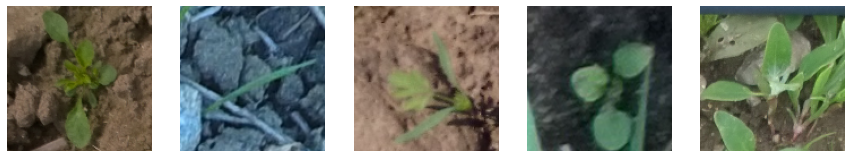

In [ ]:
plt.figure(figsize=(15, 30))
for images, labels in train_1.take(10):
    for i in range(5):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

plt.show()

In [ ]:
# # for i in range(27):
# #     X_train,y_train = next(iter(train))
# # for k in range(7):
# #     X_valid,y_valid = next(iter(valid))
# # for l in range(4):
# #     X_test,y_test = next(iter(test))
    
# train = train_1.unbatch()
# X_train_1 = list(train.map(lambda x, y: x))
# y_train_1 = list(train.map(lambda x, y: y))

# test_ = test_1.unbatch()
# X_test_1 = list(test.map(lambda x, y: x))
# y_test_1 = list(test.map(lambda x, y: y))

# valid = valid_1.unbatch()
# X_valid_1 = list(valid.map(lambda x, y: x))
# y_valid_1 = list(valid.map(lambda x, y: y))



# # print(len(X_train_1))
# # print(len(y_train_1))


## Part 1a. Transfer Learning - Classification Network 


Using the first 2 blocks of VGG-16 add extra Keras layers to create your own version of a CNN network for the classification of the images according to the number of leaves in the plant images. Note that there will be 5 classes. 


When your classifier is working:
- Plot a loss curve for training and validation data
- Plot an accuracy curve for training and validation data
- Provide confusion matrix of your network on the training including validation and testing data sets.


In [ ]:
# As input to the model use images of size no larger than 128×128
convbase= VGG16(input_shape=(128,128,3),weights='imagenet',include_top=False)

for layer in convbase.layers:
    layer.trainable = False
    
x = convbase.layers[6].output
x= Conv2D(215, kernel_size=5, activation='relu', padding='same')(x)
x= MaxPooling2D(pool_size=(3, 3))(x)
x= Conv2D(150, kernel_size=3, activation='relu', padding='same')(x)
x= MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(120, activation = "relu")(x)
x = Dense(64, activation = "relu")(x)
x = Dense(5, activation='softmax')(x)

convbase_vgg = Model(inputs=convbase.input, outputs=x)

In [ ]:
optimizer = Adam(lr=1e-4)
convbase_vgg.compile(loss = 'sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

C:\Users\mm\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
convbase_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

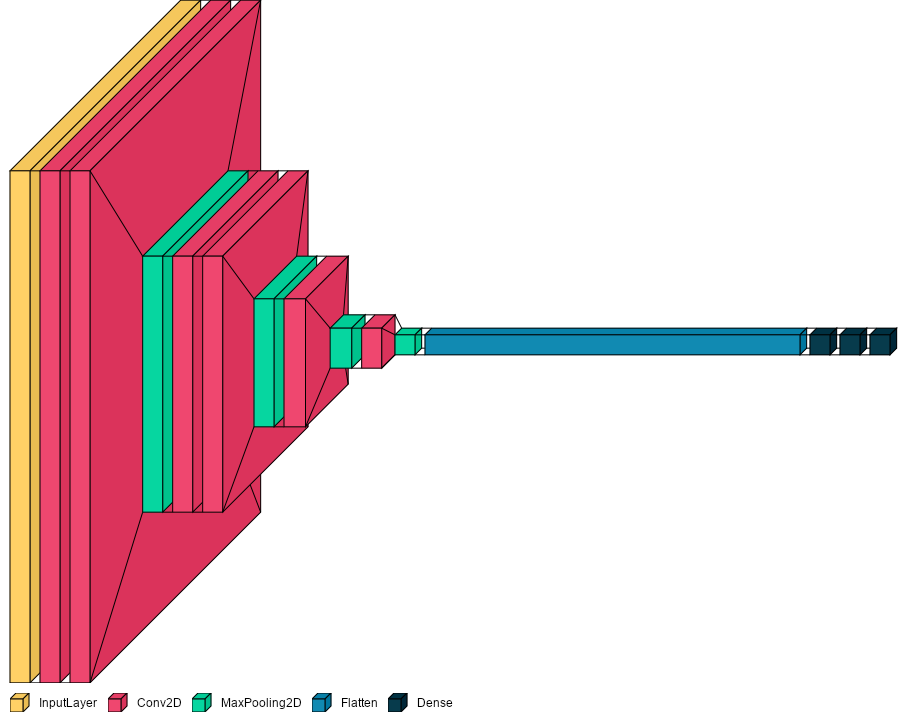

In [ ]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(convbase_vgg, legend=True, font=font)

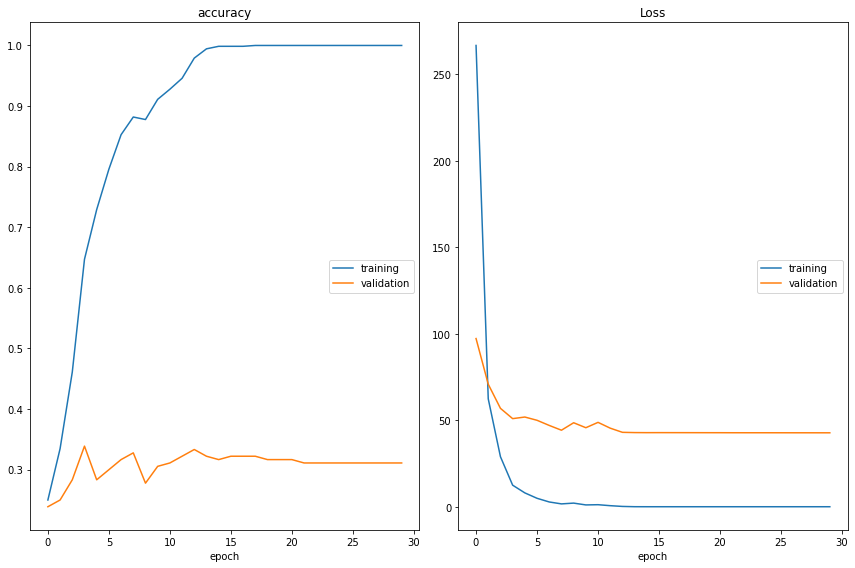

accuracy
	training         	 (min:    0.250, max:    1.000, cur:    1.000)
	validation       	 (min:    0.239, max:    0.339, cur:    0.311)
Loss
	training         	 (min:    0.000, max:  266.632, cur:    0.000)
	validation       	 (min:   42.735, max:   97.219, cur:   42.735)
26/26 [==============================] - 19s 742ms/step - loss: 4.7622e-04 - accuracy: 1.0000 - val_loss: 42.7355 - val_accuracy: 0.3111 - lr: 1.0000e-05


In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

optimi = tf.keras.optimizers.Adam(learning_rate=0.0001)
convbase_vgg.compile(loss='sparse_categorical_crossentropy', 
                           optimizer=optimi, 
                           metrics=['accuracy'])
history = convbase_vgg.fit(train_1, batch_size=32, epochs=30, verbose=1,
                                 validation_data=valid_1,callbacks=[plot_losses, reduce_lr])

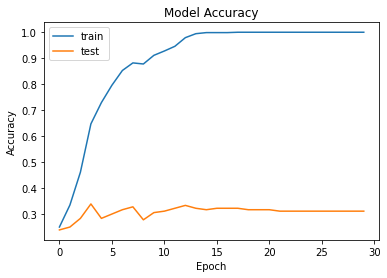

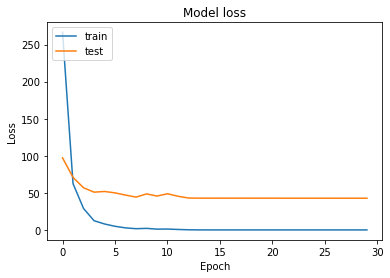

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pred_prob_train_vgg = convbase_vgg.predict(X_train)
pred_train_vgg = np.argmax(pred_prob_train_vgg , axis = 1)

pred_prob_valid_vgg = convbase_vgg.predict(X_valid)
pred_valid_vgg = np.argmax(pred_prob_valid_vgg, axis=1)

pred_prob_test_vgg = convbase_vgg.predict(X_test)
pred_test_vgg = np.argmax(pred_prob_test_vgg, axis=1)

4/4 [==============================] - 2s 343ms/step


In [ ]:
pred_test_vgg

array([2, 4, 2, 4, 3, 0, 3, 2, 3, 4, 2, 2, 2, 2, 0, 3, 3, 0, 3, 2, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 1, 2, 4, 3, 3, 4, 2, 3, 2, 2, 2, 3, 1, 4, 3,
       1, 3, 2, 4, 0, 2, 4, 3, 3, 0, 3, 0, 3, 2, 3, 0, 4, 4, 0, 3, 3, 3,
       3, 3, 2, 3, 3, 0, 2, 0, 3, 1, 2, 2, 3, 2, 3, 2, 1, 3, 3, 3, 2, 0,
       2, 3, 2, 3, 2, 0, 2, 3, 0, 2, 3, 2], dtype=int64)

In [ ]:

acc_train = accuracy_score(y_train, pred_train_vgg)
print("Training accuracy of VGG16 Model : {:.2f}%".format(acc_train * 100))
 
acc_valid = accuracy_score(y_valid, pred_valid_vgg)
print("Validation accuracy of VGG16 Model : {:.2f}%".format(acc_valid * 100))

acc_test = accuracy_score(y_test, pred_test_vgg)
print("Testing accuracy of VGG16 Model : {:.2f}%".format(acc_test * 100))

Training accuracy of VGG16 Model : 19.31%
Validation accuracy of VGG16 Model : 20.56%
Testing accuracy of VGG16 Model : 18.00%


              precision    recall  f1-score   support

           0       0.20      0.11      0.14       142
           1       0.04      0.01      0.01       149
           2       0.20      0.36      0.26       142
           3       0.21      0.40      0.27       144
           4       0.16      0.10      0.12       143

    accuracy                           0.19       720
   macro avg       0.16      0.19      0.16       720
weighted avg       0.16      0.19      0.16       720



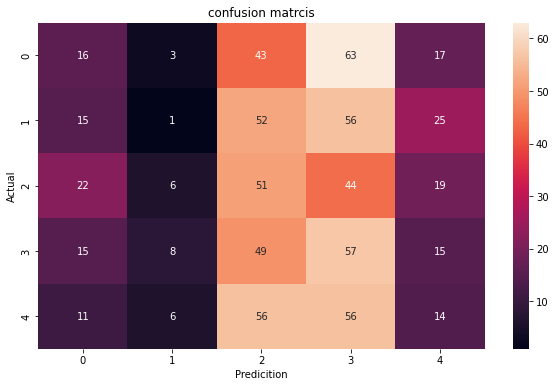

In [ ]:

print(classification_report(y_train , pred_train_vgg))
cm = confusion_matrix(y_train , pred_train_vgg)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrcis")
plt.show()

              precision    recall  f1-score   support

           0       0.43      0.26      0.33        38
           1       0.00      0.00      0.00        31
           2       0.15      0.26      0.19        38
           3       0.19      0.36      0.25        36
           4       0.22      0.11      0.15        37

    accuracy                           0.21       180
   macro avg       0.20      0.20      0.18       180
weighted avg       0.21      0.21      0.19       180



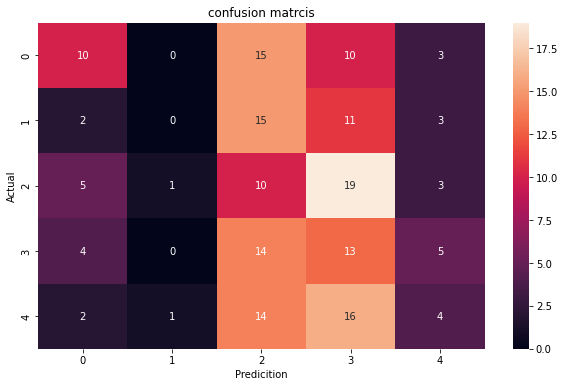

In [ ]:

print(classification_report(y_valid , pred_valid_vgg))
cm = confusion_matrix(y_valid , pred_valid_vgg)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrcis")
plt.show()

              precision    recall  f1-score   support

           0       0.15      0.10      0.12        20
           1       0.20      0.05      0.08        20
           2       0.17      0.25      0.20        20
           3       0.21      0.45      0.29        20
           4       0.10      0.05      0.07        20

    accuracy                           0.18       100
   macro avg       0.17      0.18      0.15       100
weighted avg       0.17      0.18      0.15       100



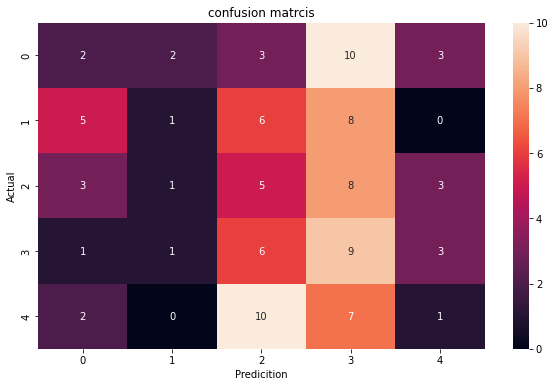

In [ ]:
print(classification_report(y_test , pred_test_vgg))

cm = confusion_matrix(y_test,pred_test_vgg)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrcis")
plt.show()

## Discussion

For the classification problem, using the first 2 blocks of pretrained model VGG-16 which was trained using imagenet, making a layer. trainable equal false for selecting just trainable weight from the model. specified input image shape as 128 * 128, adding 2 convolution layers to improve the performance with max pooling before flatten layer to make it suitable for dense layers.

####Training

```
After training the mode with batch size = 32, 
epoch = 30 and metrics= accuracy, for training evaluation,the accuracy it 
achieved was 19.31%  the best class that can predict was 3 with an f-score of 
27%  and recall of 40% that is mean there is underfitting the model can't learn from training data.
```


####Validation 
```
for validation the accuracy it achieved was 20.56% the best class that can 
predict was 3 with an f-score of 36%  and recall of 25%, the model can't 
predict class 1 ever. that is mean there is underfitting the model can't learn 
from training data so it can't predict validation data correctly.
```
####Testing
```
for validation, the accuracy it achieved was 18% the best class that can 
predict was 3 with an f-score of 45%  and recall of 29%.
that is mean there is underfitting the model can't learn from training data so 
it can't predict testing data correctly.
```

The best class predicted was class 3.
The model can improve by adding more data to the model or using data augmentation

## Part 1b. Transfer Learning - Regression Reformulation
### Step 1 
Repeat the steps of Part 1a. but reformulate as a regression problem, i.e., your network needs to output a single float value ranging between 0 to 6 corresponding to the number of leaves.

- Plot a loss curve for training and validation data
- Plot an accuracy curve for training and validation data
- Provide confusion matrix of your network on the training including validation and testing data sets.


In [ ]:
convbase2= VGG16(input_shape=(128,128,3),weights='imagenet',include_top=False)

for layer in convbase2.layers:
    layer.trainable = False
    
# last layers output
y = convbase2.layers[6].output
# Flatten as before
y= Conv2D(120, kernel_size=5, activation='relu', padding='same')(y)
y= MaxPooling2D(pool_size=(3, 3))(y)
y= Conv2D(60, kernel_size=3, activation='relu', padding='same')(y)
y= MaxPooling2D(pool_size=(2, 2))(y)
y = Flatten()(y)
y = Dense(215, activation = "relu")(y)
y = Dense(120, activation = "relu")(y)
y = Dense(1 ,activation = "linear")(y)

from tensorflow.keras.models import Model
convbase2_vgg = Model(inputs=convbase2.input, outputs=y)

In [ ]:
from keras import optimizers
optimizer = optimizers.RMSprop(lr=2e-5)
convbase2_vgg.compile(loss = 'mse',optimizer=optimizer,metrics=['mean_squared_error'])

C:\Users\mm\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


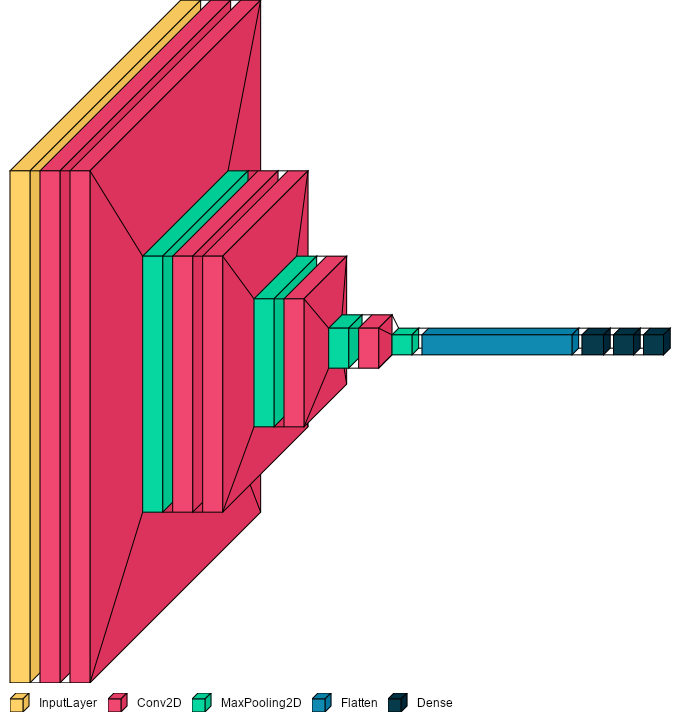

In [ ]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(convbase2_vgg, legend=True, font=font)

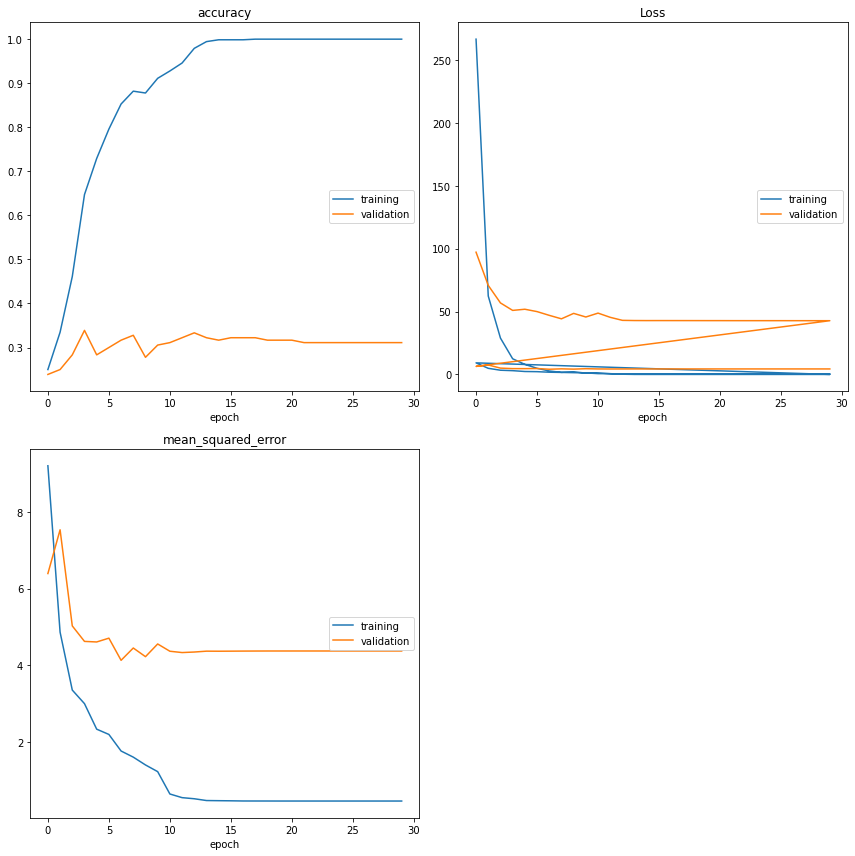

accuracy
	training         	 (min:    0.250, max:    1.000, cur:    1.000)
	validation       	 (min:    0.239, max:    0.339, cur:    0.311)
Loss
	training         	 (min:    0.000, max:  266.632, cur:    0.466)
	validation       	 (min:    4.130, max:   97.219, cur:    4.373)
mean_squared_error
	training         	 (min:    0.466, max:    9.196, cur:    0.466)
	validation       	 (min:    4.130, max:    7.529, cur:    4.373)
23/23 [==============================] - 15s 680ms/step - loss: 0.4658 - mean_squared_error: 0.4658 - val_loss: 4.3730 - val_mean_squared_error: 4.3730 - lr: 2.0000e-12


In [ ]:

history2 = convbase2_vgg.fit(X_train, y_train, batch_size=32, epochs=30, verbose=1 ,validation_data=(X_valid,y_valid),callbacks=[plot_losses, reduce_lr])

In [ ]:
pred_prob_train_regg = convbase2_vgg.predict(X_train)

pred_prob_valid_regg = convbase2_vgg.predict(X_valid)

pred_prob_test_regg = convbase2_vgg.predict(X_test)


4/4 [==============================] - 1s 304ms/step


In [ ]:
pred_prob_train_regg


array([[ 6.0478872e-01],
       [ 2.9580636e+00],
       [ 1.9787055e+00],
       [ 3.6094303e+00],
       [ 1.2909726e+00],
       [ 2.4713888e+00],
       [ 3.4754610e+00],
       [ 1.6176432e+00],
       [ 2.4791770e+00],
       [ 1.3511590e+00],
       [ 7.5724810e-01],
       [ 9.9827093e-01],
       [ 2.4257989e+00],
       [ 4.2269511e+00],
       [ 1.1443771e+00],
       [ 2.1027954e-02],
       [ 2.1345451e+00],
       [ 1.8338715e+00],
       [ 2.1885066e+00],
       [ 1.9861559e+00],
       [ 1.0502838e+00],
       [ 2.2201710e+00],
       [ 2.1223824e+00],
       [ 1.6960446e+00],
       [ 4.9127761e-01],
       [ 2.3947196e+00],
       [ 2.2219722e+00],
       [ 1.6373862e+00],
       [ 1.7327465e+00],
       [ 1.9524919e+00],
       [ 2.2544160e+00],
       [ 1.8033992e+00],
       [ 4.2151265e+00],
       [ 1.9404525e+00],
       [ 1.9754633e+00],
       [ 6.7431396e-01],
       [ 2.2121892e+00],
       [-5.2429634e-01],
       [ 6.0438544e-02],
       [ 2.2431865e+00],


In [ ]:
# MSE for traning
mean_squared_error(pred_prob_train_regg, y_train, squared=False)

0.6824806493394855

In [ ]:
# MSE for validation
mean_squared_error(pred_prob_valid_regg, y_valid,squared=False)

2.0911632902093764

In [ ]:
# MSE for testing
mean_squared_error(pred_prob_test_regg, y_test,squared=False)

1.8797368622342825

In [ ]:
pred_train_regg =pred_prob_train_regg.astype(int)
pred_test_regg =pred_prob_test_regg.astype(int)
pred_valid_regg=pred_prob_valid_regg.astype(int)

In [ ]:
len(pred_valid_regg)

180

In [ ]:
len(y_train)

720

In [ ]:

acc_train_regg = accuracy_score(y_train, pred_train_regg)
print("Training accuracy of VGG16 Model : {:.2f}%".format(acc_train_regg * 100))
 
acc_valid_regg = accuracy_score(y_valid, pred_valid_regg)
print("Validation accuracy of VGG16 Model : {:.2f}%".format(acc_valid_regg * 100))

acc_test_regg = accuracy_score(y_test, pred_test_regg)
print("Testing accuracy of VGG16 Model : {:.2f}%".format(acc_test_regg * 100))

Training accuracy of VGG16 Model : 43.19%
Validation accuracy of VGG16 Model : 18.33%
Testing accuracy of VGG16 Model : 21.00%


              precision    recall  f1-score   support

           0       0.73      0.72      0.73       142
           1       0.44      0.66      0.53       149
           2       0.31      0.46      0.37       142
           3       0.24      0.21      0.22       144
           4       1.00      0.10      0.18       143

    accuracy                           0.43       720
   macro avg       0.54      0.43      0.40       720
weighted avg       0.54      0.43      0.41       720



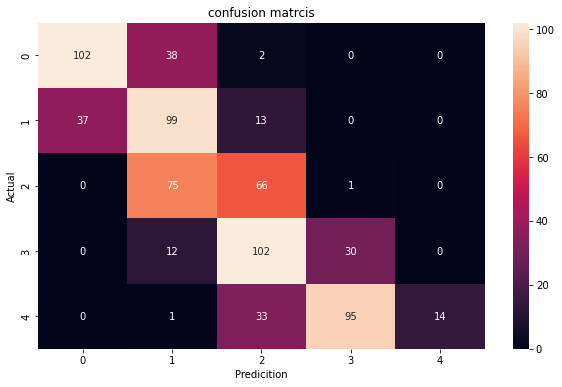

In [ ]:

print(classification_report(y_train , pred_train_regg))
cm = confusion_matrix(y_train , pred_train_regg)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrcis")
plt.show()

              precision    recall  f1-score   support

           0       0.20      0.11      0.14       142
           1       0.04      0.01      0.01       149
           2       0.20      0.36      0.26       142
           3       0.21      0.40      0.27       144
           4       0.16      0.10      0.12       143

    accuracy                           0.19       720
   macro avg       0.16      0.19      0.16       720
weighted avg       0.16      0.19      0.16       720



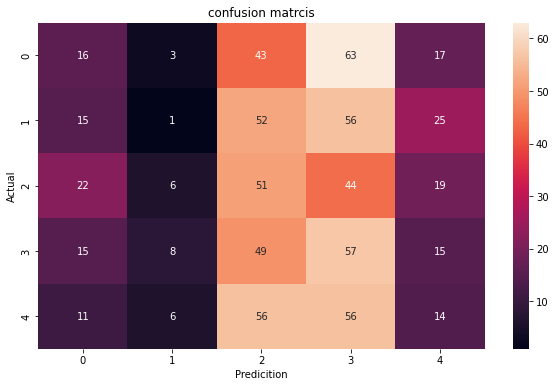

In [ ]:

print(classification_report(y_train , pred_train_vgg))
cm = confusion_matrix(y_train , pred_train_vgg)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrcis")
plt.show()

              precision    recall  f1-score   support

           0       0.20      0.11      0.14       142
           1       0.04      0.01      0.01       149
           2       0.20      0.36      0.26       142
           3       0.21      0.40      0.27       144
           4       0.16      0.10      0.12       143

    accuracy                           0.19       720
   macro avg       0.16      0.19      0.16       720
weighted avg       0.16      0.19      0.16       720



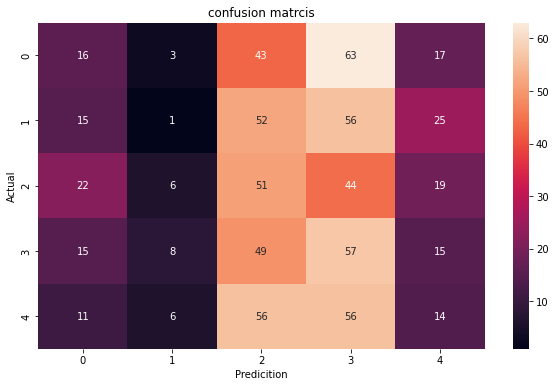

In [ ]:

print(classification_report(y_train , pred_train_vgg))
cm = confusion_matrix(y_train , pred_train_vgg)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrcis")
plt.show()

## Discussion

For Regression, repeat the steps from Part 1a but for regression not a classification by determining the last layer in the model with a number of classes = 1, activation = linear, and the metrics = mean square error.
 
####Training
```
After training the mode with batch size = 32, epoch = 
30 and metrics= mean square error, for training 
evaluation, the accuracy it achieved was 43% the best
the class that can predict was 0 with an f-score of 73%  
and recall of 72%.
the score of mean square error = 0.68
```
####Validation 
```
For validation, the accuracy it achieved was 18.33% the best class that can 
predict was 3 with an f-score of 27%  and recall of 40%. 
the score of mean square error = 2.09

```

####Testing
```
For testing the accuracy it achieved was 21% the best class that can 
predict was 3 with an f-score of 27%  and recall of 40%. 
the score of mean square error = 1.88

```




## Part 2. Improve the  Model

Regularization and data augmentation are common strategies to deal with small datasets.



### Part_1

In [ ]:
model1= VGG16(input_shape=(128,128,3),weights='imagenet',include_top=False)

for layer in model1.layers:
    layer.trainable = False
    
# last layers output
z = model1.layers[6].output
#   Flatten as before
z = Conv2D(500, kernel_size=5, activation='relu', padding='same')(z)
z = MaxPooling2D(pool_size=(3, 3))(z)
z = Dropout(0.3)(z)
z = BatchNormalization()(z)
z = Conv2D(300, kernel_size=3, activation='relu', padding='same')(z)
z = MaxPooling2D(pool_size=(2, 2))(z)
z = Dropout(0.3)(z)
z = BatchNormalization()(z)

z = Conv2D(64, kernel_size=3, activation='relu', padding='same')(z)
z = Flatten()(z)
z = Dense(215, activation = "relu")(z)
z = Dense(120, activation = "relu")(z)
z = Dense(5, activation='softmax')(z)

mode_p1 = Model(inputs=model1.input, outputs=z)

In [ ]:
optimizer = Adam(lr=1e-4)
mode_p1.compile(loss = 'sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

C:\Users\mm\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
mode_p1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

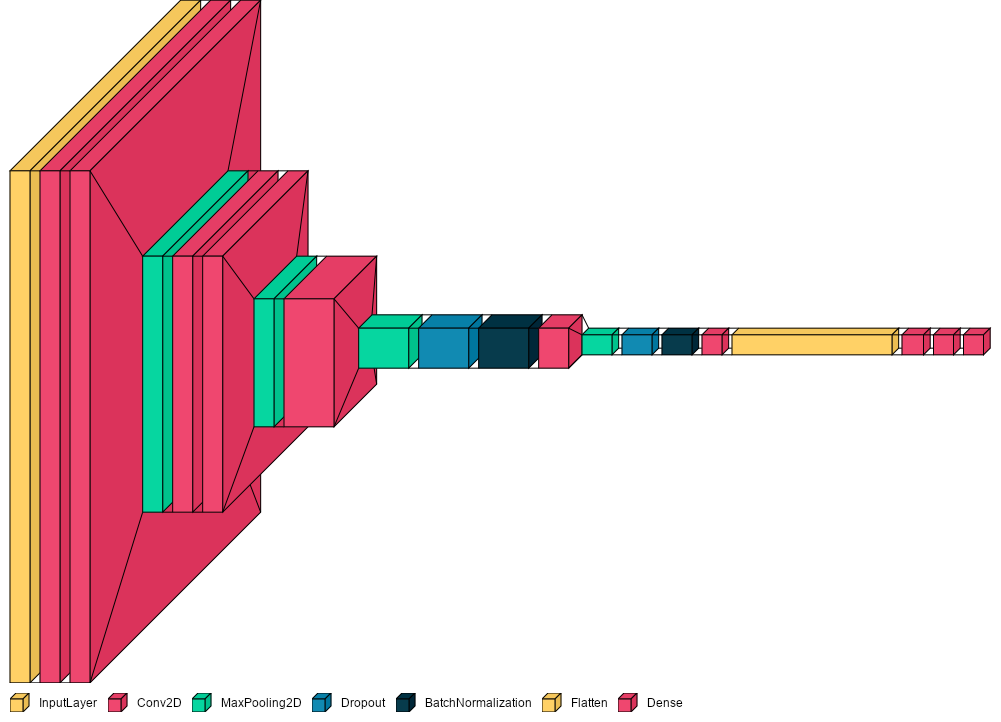

In [ ]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(mode_p1, legend=True, font=font)

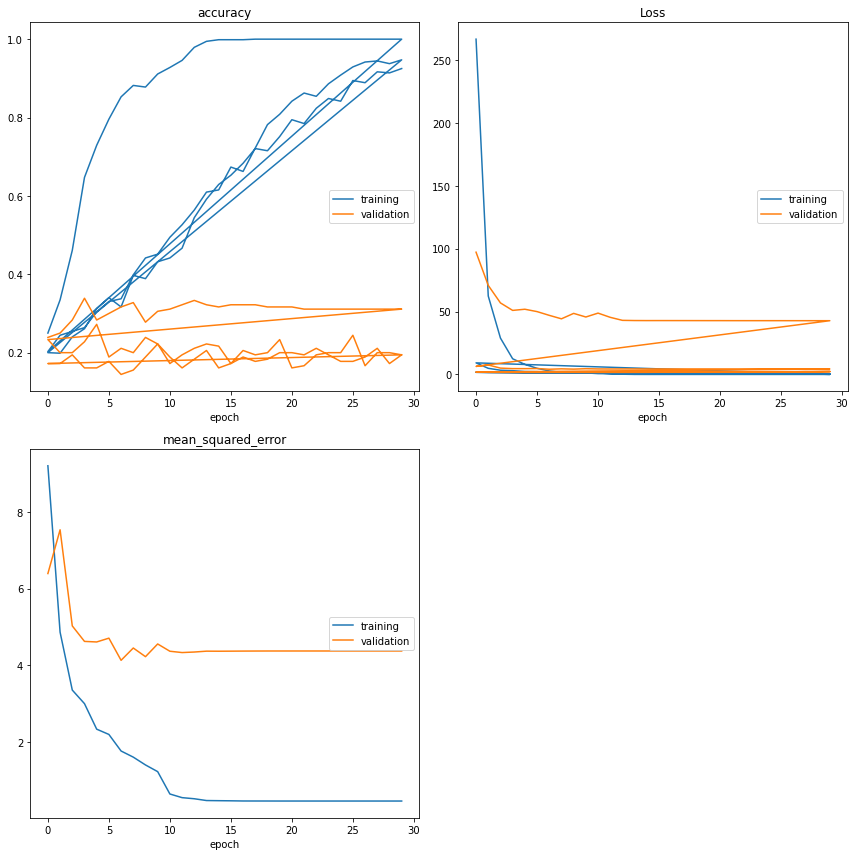

accuracy
	training         	 (min:    0.199, max:    1.000, cur:    0.925)
	validation       	 (min:    0.144, max:    0.339, cur:    0.194)
Loss
	training         	 (min:    0.000, max:  266.632, cur:    0.267)
	validation       	 (min:    1.614, max:   97.219, cur:    2.304)
mean_squared_error
	training         	 (min:    0.466, max:    9.196, cur:    0.466)
	validation       	 (min:    4.130, max:    7.529, cur:    4.373)
23/23 [==============================] - 29s 1s/step - loss: 0.2673 - accuracy: 0.9250 - val_loss: 2.3035 - val_accuracy: 0.1944


In [ ]:

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
convbase_vgg.compile(loss='sparse_categorical_crossentropy', 
                           optimizer=opt, 
                           metrics=['accuracy'])
history_p1 = mode_p1.fit(X_train,y_train, batch_size=32, epochs=30, verbose=1,
                                 validation_data=(X_valid,y_valid),callbacks=[plot_losses])

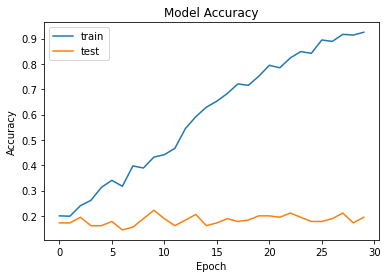

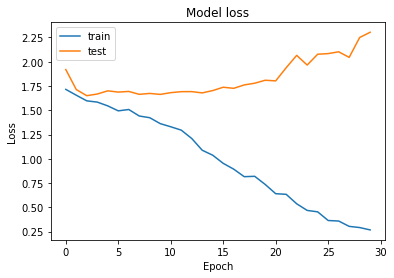

In [ ]:
plt.plot(history_p1.history['accuracy'])
plt.plot(history_p1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history_p1.history['loss'])
plt.plot(history_p1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pred_prob_train_p1 = mode_p1.predict(X_train)
pred_train_p1 = np.argmax(pred_prob_train_p1 , axis = 1)

pred_prob_valid_p1 = mode_p1.predict(X_valid)
pred_valid_p1 = np.argmax(pred_prob_valid_p1, axis=1)

pred_prob_test_p1 = mode_p1.predict(X_test)
pred_test_p1 = np.argmax(pred_prob_test_p1, axis=1)

4/4 [==============================] - 2s 435ms/step


In [ ]:

acc_train_p1 = accuracy_score(y_train, pred_train_p1)
print("Training accuracy of VGG16 Model : {:.2f}%".format(acc_train_p1 * 100))
 
acc_valid_p1 = accuracy_score(y_valid, pred_valid_p1)
print("Validation accuracy of VGG16 Model : {:.2f}%".format(acc_valid_p1 * 100))

acc_test_p1 = accuracy_score(y_test, pred_test_p1)
print("Testing accuracy of VGG16 Model : {:.2f}%".format(acc_test_p1 * 100))

Training accuracy of VGG16 Model : 97.22%
Validation accuracy of VGG16 Model : 19.44%
Testing accuracy of VGG16 Model : 15.00%


              precision    recall  f1-score   support

           0       0.99      0.96      0.97       142
           1       1.00      0.94      0.97       149
           2       1.00      0.97      0.99       142
           3       0.96      0.99      0.98       144
           4       0.92      1.00      0.96       143

    accuracy                           0.97       720
   macro avg       0.97      0.97      0.97       720
weighted avg       0.97      0.97      0.97       720



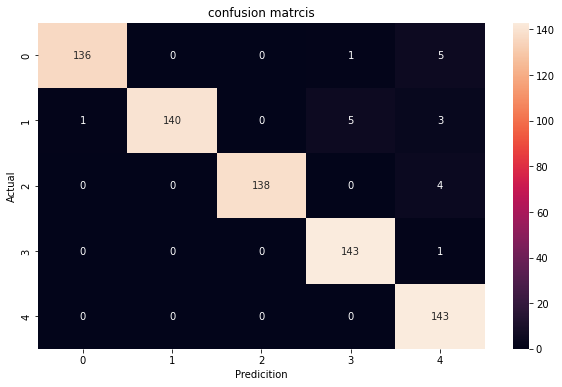

In [ ]:

print(classification_report(y_train , pred_train_p1))
cm = confusion_matrix(y_train , pred_train_p1)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrcis")
plt.show()

C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.20      0.16      0.18        38
           1       0.18      0.29      0.22        31
           2       0.15      0.21      0.18        38
           3       0.25      0.22      0.24        36
           4       0.29      0.05      0.09        37
           5       0.00      0.00      0.00         0

    accuracy                           0.18       180
   macro avg       0.15      0.13      0.13       180
weighted avg       0.21      0.18      0.18       180



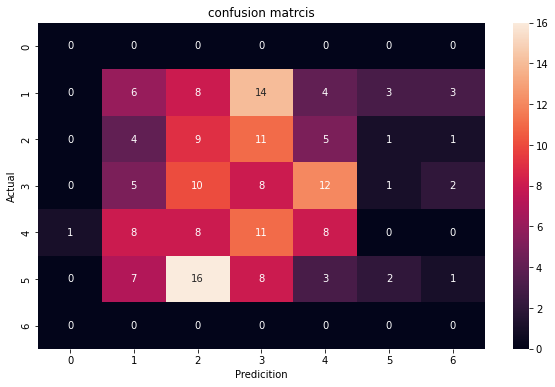

In [ ]:

print(classification_report(y_valid , pred_valid_regg))
cm = confusion_matrix(y_valid , pred_valid_regg)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrcis")
plt.show()

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.16      0.15      0.15        20
           1       0.26      0.40      0.31        20
           2       0.23      0.35      0.28        20
           3       0.12      0.10      0.11        20
           4       0.50      0.05      0.09        20

    accuracy                           0.21       100
   macro avg       0.21      0.18      0.16       100
weighted avg       0.25      0.21      0.19       100



C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


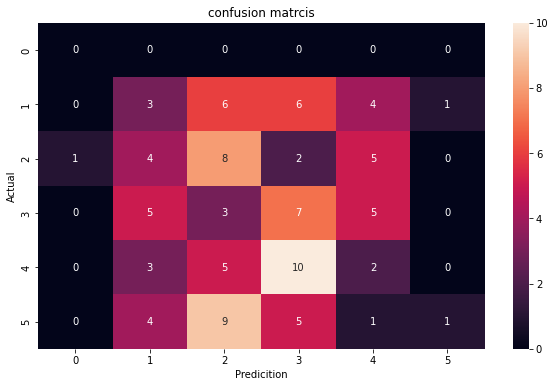

In [ ]:

print(classification_report(y_test , pred_test_regg))
cm = confusion_matrix(y_test , pred_test_regg)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrcis")
plt.show()

## Discussion

As a step for improving the performance of the model by using  Batch Normalization and Dropout.
same as part 1a using the same layers but adding Batch Normalization and Dropout. 

####Training 
```
for training the accuracy it achieved was 97%.

```

####Validation 
```
For validation, the accuracy it achieved was 18% the best class that can 
predict was 1 with an f-score of 22%  and recall of 29%. 
```

####Testing 
```
For testing the accuracy it achieved was 21% the best class that can 
predict was 1 with an f-score of 31%  and recall of 40%. 
```
that is mean there is overfitting in the model because the result of training is very well and validation and testing are very bad which can be solved be adding a more complex layer into the model.


##  Part_2

In [ ]:
model2= VGG16(input_shape=(128,128,3),weights='imagenet',include_top=False)

for layer in model2.layers:
    layer.trainable = False
    
# last layers output
m = model2.layers[6].output
# Flatten as before
m = Conv2D(500, kernel_size=5, activation='relu', padding='same')(m)
m = MaxPooling2D(pool_size=(3, 3))(m)
m = Dropout(0.3)(m)
m = BatchNormalization()(m)
m = Conv2D(300, kernel_size=3, activation='relu', padding='same')(m)
m = MaxPooling2D(pool_size=(2, 2))(m)
m = Dropout(0.3)(m)
m = BatchNormalization()(m)

m = Flatten()(m)
m= Dense(215, activation = "relu")(m)
m = Dense(120, activation = "relu")(m)
m = Dense(1 ,activation = "linear")(m)

from tensorflow.keras.models import Model
model2 = Model(inputs=model2.input, outputs=m)

In [ ]:
from keras import optimizers
optimizer = optimizers.RMSprop(lr=2e-5)
model2.compile(loss = 'mse',optimizer=optimizer,metrics=['mean_squared_error'])

C:\Users\mm\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


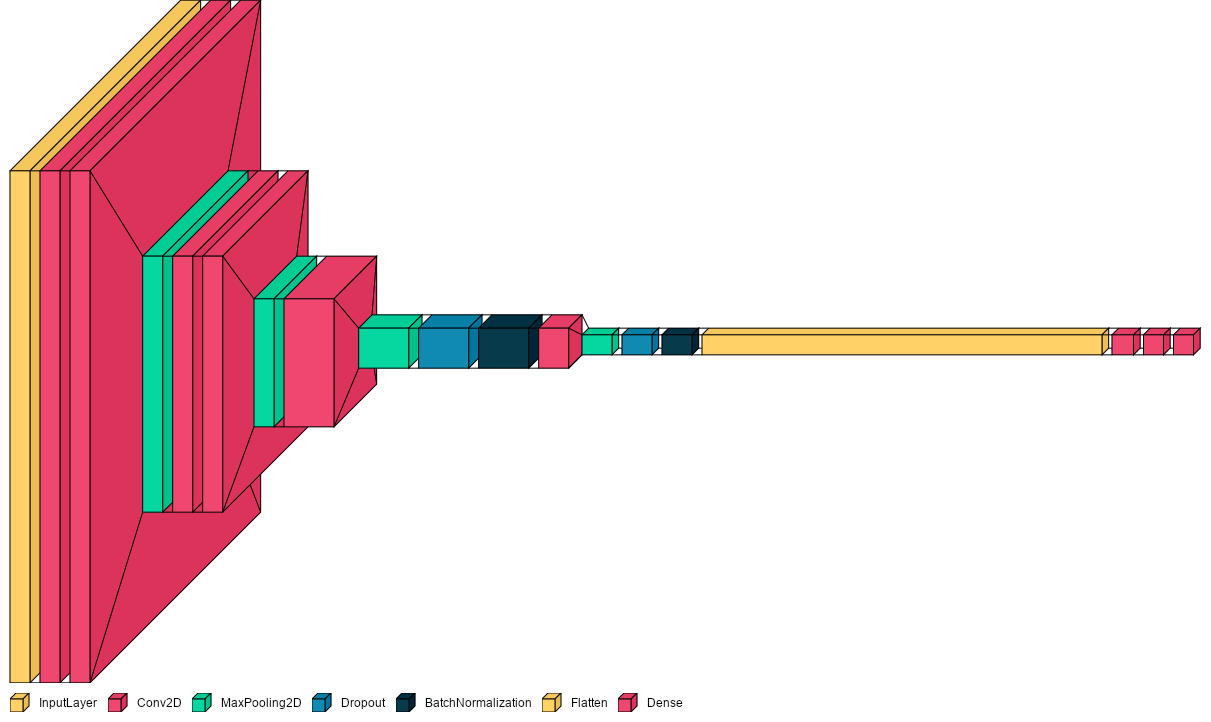

In [ ]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model2, legend=True, font=font)

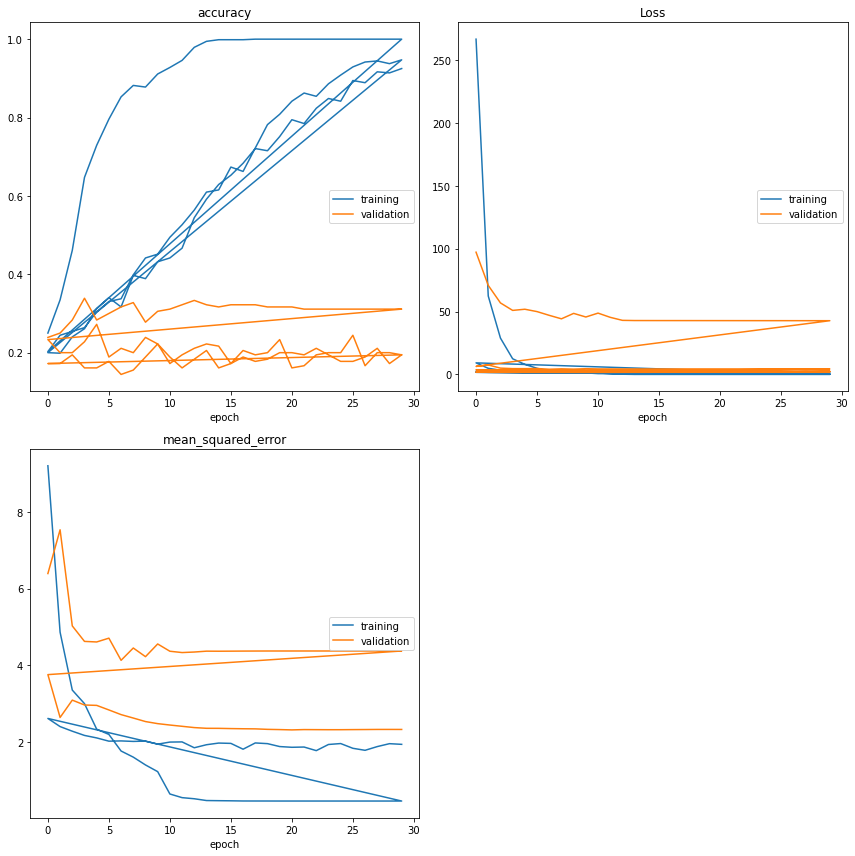

accuracy
	training         	 (min:    0.199, max:    1.000, cur:    0.925)
	validation       	 (min:    0.144, max:    0.339, cur:    0.194)
Loss
	training         	 (min:    0.000, max:  266.632, cur:    1.942)
	validation       	 (min:    1.614, max:   97.219, cur:    2.330)
mean_squared_error
	training         	 (min:    0.466, max:    9.196, cur:    1.942)
	validation       	 (min:    2.318, max:    7.529, cur:    2.330)

Epoch 30: ReduceLROnPlateau reducing learning rate to 1.9999999878450583e-09.
23/23 [==============================] - 31s 1s/step - loss: 1.9421 - mean_squared_error: 1.9421 - val_loss: 2.3299 - val_mean_squared_error: 2.3299 - lr: 2.0000e-08


In [ ]:

history3 = model2.fit(X_train, y_train, batch_size=32, epochs=30, verbose=1 ,validation_data=(X_valid,y_valid),callbacks=[plot_losses, reduce_lr])

In [ ]:
pred_prob_train_p2 = model2.predict(X_train)

pred_prob_valid_p2 = model2.predict(X_valid)

pred_prob_test_p2 = model2.predict(X_test)


4/4 [==============================] - 2s 482ms/step


In [ ]:
pred_prob_train_p2


array([[ 1.0690945 ],
       [ 1.2211697 ],
       [ 1.3625497 ],
       [ 1.8770255 ],
       [ 1.4070736 ],
       [ 1.7456222 ],
       [ 1.7443727 ],
       [ 1.6457049 ],
       [ 1.6184256 ],
       [ 1.3667259 ],
       [ 1.1910391 ],
       [ 1.2900745 ],
       [ 1.9034818 ],
       [ 2.389591  ],
       [ 0.8025637 ],
       [ 0.5854522 ],
       [ 1.1788126 ],
       [ 1.9857658 ],
       [ 1.6709851 ],
       [ 1.4591675 ],
       [ 1.3951156 ],
       [ 2.303052  ],
       [ 1.6763183 ],
       [ 2.013279  ],
       [ 1.0353168 ],
       [ 1.8879768 ],
       [ 1.0469307 ],
       [ 1.5305262 ],
       [ 1.2653836 ],
       [ 1.7776059 ],
       [ 1.733686  ],
       [ 1.7757752 ],
       [ 1.6435022 ],
       [ 1.9653629 ],
       [ 1.8636812 ],
       [ 1.4675082 ],
       [ 1.5810958 ],
       [ 0.18702999],
       [ 1.425215  ],
       [ 1.7231549 ],
       [ 1.4561747 ],
       [ 0.87556463],
       [ 1.324166  ],
       [ 0.9393257 ],
       [ 1.8691174 ],
       [ 2

In [ ]:
from sklearn.metrics import mean_squared_error
# MSE for traning
mean_squared_error(pred_prob_train_p2, y_train, squared=False)

1.24463447257784

In [ ]:
# MSE for validation
mean_squared_error(pred_prob_valid_p2, y_valid,squared=False)

1.5264013705537756

In [ ]:
# MSE for testing
mean_squared_error(pred_prob_test_p2, y_test,squared=False)

1.5032610585999087

In [ ]:
pred_train_p2 =pred_prob_train_p2.astype(int)
pred_test_p2 =pred_prob_test_p2.astype(int)
pred_valid_p2=pred_prob_valid_p2.astype(int)

C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.55      0.27      0.36       142
           1       0.23      0.79      0.36       149
           2       0.11      0.11      0.11       142
           3       0.00      0.00      0.00       144
           4       0.00      0.00      0.00       143

    accuracy                           0.24       720
   macro avg       0.18      0.23      0.17       720
weighted avg       0.18      0.24      0.17       720



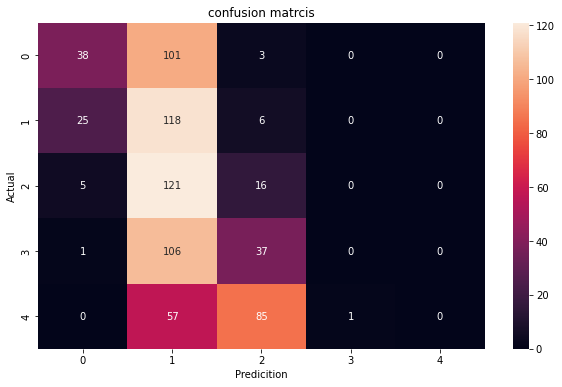

In [ ]:

print(classification_report(y_train , pred_train_p2))
cm = confusion_matrix(y_train , pred_train_p2)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrcis")
plt.show()

              precision    recall  f1-score   support

           0       0.22      0.05      0.09        38
           1       0.17      0.81      0.29        31
           2       0.21      0.16      0.18        38
           3       0.00      0.00      0.00        36
           4       0.00      0.00      0.00        37

    accuracy                           0.18       180
   macro avg       0.12      0.20      0.11       180
weighted avg       0.12      0.18      0.11       180



C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


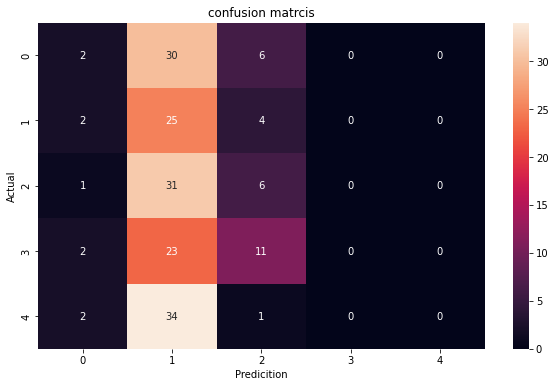

In [ ]:

print(classification_report(y_valid , pred_valid_p2))
cm = confusion_matrix(y_valid , pred_valid_p2)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrcis")
plt.show()

C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.18      0.65      0.29        20
           2       0.12      0.10      0.11        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20

    accuracy                           0.15       100
   macro avg       0.06      0.15      0.08       100
weighted avg       0.06      0.15      0.08       100



C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


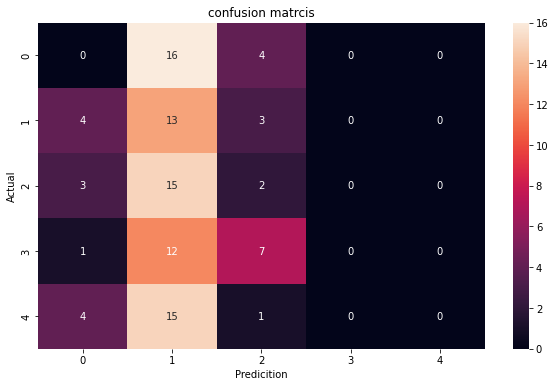

In [ ]:

print(classification_report(y_test , pred_test_p2))
cm = confusion_matrix(y_test , pred_test_p2)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrcis")
plt.show()



####Training

```
After training the mode with batch size = 32, 
epoch = 30 and metrics= mean square error, for training evaluation, the
 accuracy of it achieved was 24 %.the model can't predict class 3 and 4 ever  
the mean square error =  1.244
```


####Validation 
```
for validation, the accuracy it achieved was 18%.
the best class that predict was 1 with an f-score of 29%  and recall of 
81%, the model can't predict class 3 and 4 ever. 
the mean square error =  1.52
```
####Testing
```
for testing, the accuracy it achieved was 15% 
that is mean there is underfitting the model can't learn 
from training data very well so it can't predict new 
data or testing data correctly.
the mean square error =  1.50

```

regrading the result there us a sign for underfitting
the model cam improve by using data augmentation

# Data Augmentation

In [ ]:
data_gen = ImageDataGenerator(
        rotation_range=10, 
        width_shift_range=0.3, 
        height_shift_range=0.3, 
        zoom_range=0.3, 
        horizontal_flip=True)
        

In [ ]:
train_generator = data_gen.flow_from_directory(
                  directory='cv_3/training/',
                  target_size=(128, 128), 
                  color_mode="rgb", 
                  batch_size=32,
                  class_mode="binary",
                  seed=2020)

Found 900 images belonging to 5 classes.


In [ ]:
#another way for augmentation
# total_images=1000
# import Augmentor
# p = Augmentor.Pipeline(source_directory='cvc_3/training/',output_directory="C:/Users/mm/cvc_3/augmented")
# p.rotate90(probability=0.1)
# p.flip_left_right(probability=0.4)
# p.flip_top_bottom(probability=0.8)
# p.sample(total_images)

In [ ]:

data_gen = ImageDataGenerator(rescale=1/255.,validation_split=0.2)

X_train = np.concatenate([X_train,X_valid])
y_train = np.concatenate([y_train,y_valid])

train_gen = data_gen.flow(X_train, y_train, batch_size=28,subset='training',seed=7)
valida_gen = data_gen.flow(X_train, y_train, batch_size=28,subset='validation',seed=7)

In [ ]:
x_train_gan , y_train_gan = next(train_gen)
x_val_gan , y_val_gan = next(valida_gen)

In [ ]:
x_train_gan.shape

(28, 128, 128, 3)

In [ ]:
x_train_gan/=255
x_val_gan/=255

### Part_1

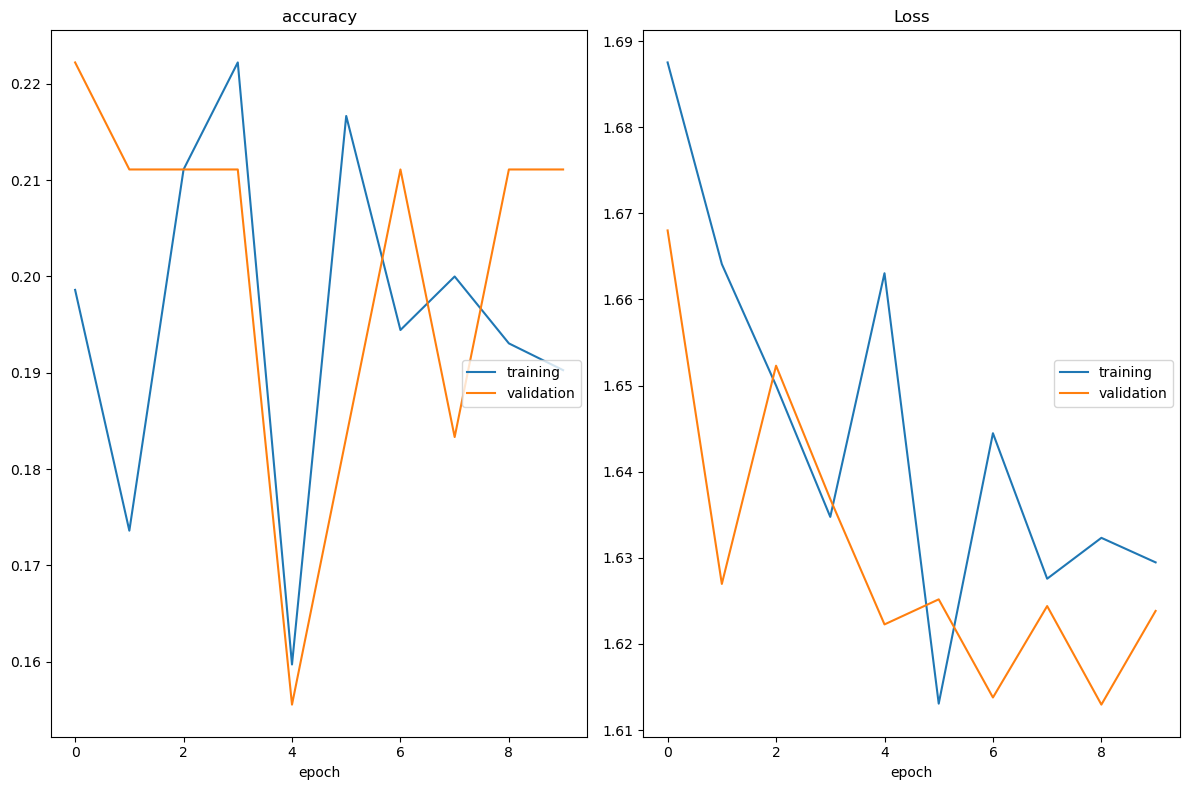

accuracy
	training         	 (min:    0.160, max:    0.222, cur:    0.190)
	validation       	 (min:    0.156, max:    0.222, cur:    0.211)
Loss
	training         	 (min:    1.613, max:    1.688, cur:    1.629)
	validation       	 (min:    1.613, max:    1.668, cur:    1.624)
26/26 [==============================] - 60s 2s/step - loss: 1.6295 - accuracy: 0.1903 - val_loss: 1.6238 - val_accuracy: 0.2111


In [ ]:
history_p3 = mode_p1.fit(train_gen, batch_size=32, epochs=10, verbose=1,
                         validation_data=valida_gen,callbacks=[plot_losses])

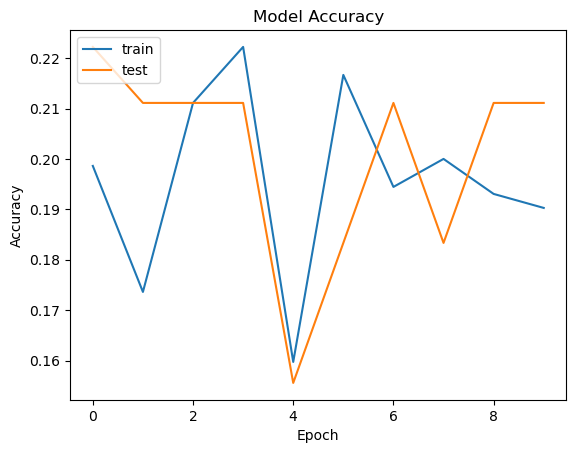

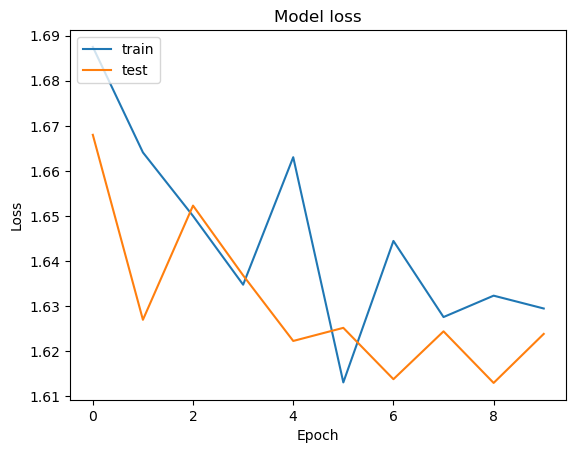

In [ ]:
plt.plot(history_p3.history['accuracy'])
plt.plot(history_p3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history_p3.history['loss'])
plt.plot(history_p3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
s1_pred_prob_train_p1 = mode_p1.predict(x_train_gan)
s1_pred_train_p1 = np.argmax(s1_pred_prob_train_p1 , axis = 1)

s1_pred_prob_valid_p1 = mode_p1.predict(x_val_gan)
s1_pred_valid_p1 = np.argmax(s1_pred_prob_valid_p1, axis=1)

s1_pred_prob_test_p1 = mode_p1.predict(X_test)
s1_pred_test_p1 = np.argmax(s1_pred_prob_test_p1, axis=1)

4/4 [==============================] - 3s 702ms/step


In [ ]:

s1_acc_train_p1 = accuracy_score(y_train_gan, s1_pred_train_p1)
print("Training accuracy of VGG16 Model : {:.2f}%".format(s1_acc_train_p1 * 100))
 
s1_acc_valid_p1 = accuracy_score(y_val_gan, s1_pred_valid_p1)
print("Validation accuracy of VGG16 Model : {:.2f}%".format(s1_acc_valid_p1 * 100))

s1_acc_test_p1 = accuracy_score(y_test, s1_pred_test_p1)
print("Testing accuracy of VGG16 Model : {:.2f}%".format(s1_acc_test_p1 * 100))

Training accuracy of VGG16 Model : 25.00%
Validation accuracy of VGG16 Model : 21.43%
Testing accuracy of VGG16 Model : 17.00%


F:\New folder (3)\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\New folder (3)\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\New folder (3)\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.25      1.00      0.40         7
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         6

    accuracy                           0.25        28
   macro avg       0.05      0.20      0.08        28
weighted avg       0.06      0.25      0.10        28



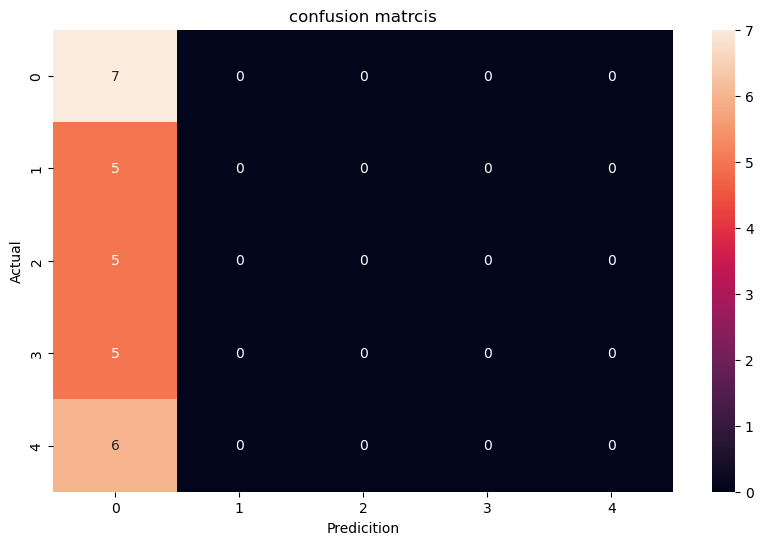

In [ ]:

print(classification_report(y_train_gan , s1_pred_train_p1))
cm = confusion_matrix(y_train_gan , s1_pred_train_p1)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrcis")
plt.show()

              precision    recall  f1-score   support

           0       0.21      1.00      0.35         6
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         5

    accuracy                           0.21        28
   macro avg       0.04      0.20      0.07        28
weighted avg       0.05      0.21      0.08        28



F:\New folder (3)\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\New folder (3)\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\New folder (3)\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


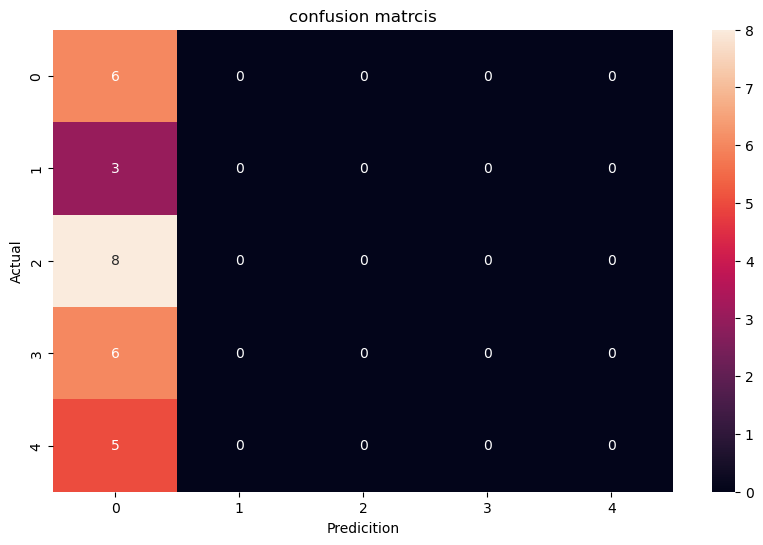

In [ ]:

print(classification_report(y_val_gan , s1_pred_valid_p1))
cm = confusion_matrix(y_val_gan , s1_pred_valid_p1)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrcis")
plt.show()

F:\New folder (3)\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\New folder (3)\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\New folder (3)\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.17      0.05      0.08        20
           1       0.18      0.60      0.27        20
           2       0.00      0.00      0.00        20
           3       0.14      0.15      0.14        20
           4       0.25      0.05      0.08        20

    accuracy                           0.17       100
   macro avg       0.15      0.17      0.12       100
weighted avg       0.15      0.17      0.12       100



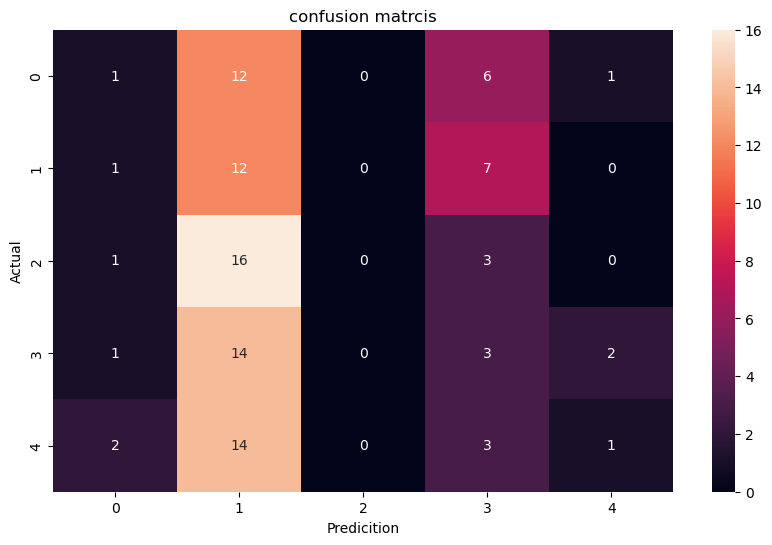

In [ ]:

print(classification_report(y_test , s1_pred_test_p1))
cm = confusion_matrix(y_test , s1_pred_test_p1)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrcis")
plt.show()

### Part_2

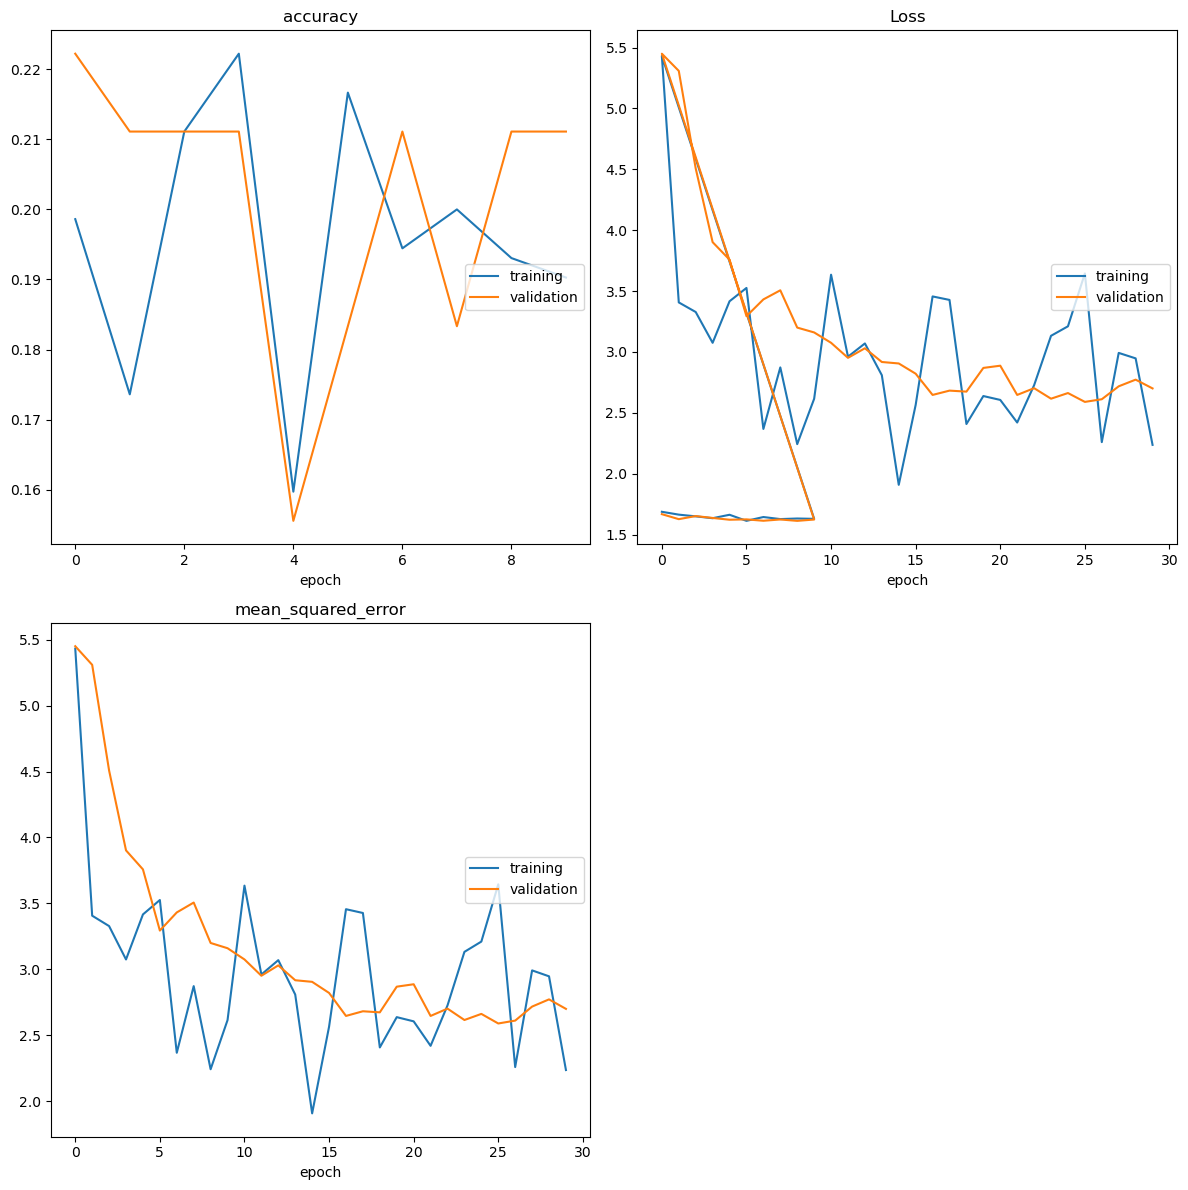

accuracy
	training         	 (min:    0.160, max:    0.222, cur:    0.190)
	validation       	 (min:    0.156, max:    0.222, cur:    0.211)
Loss
	training         	 (min:    1.613, max:    5.432, cur:    2.237)
	validation       	 (min:    1.613, max:    5.450, cur:    2.701)
mean_squared_error
	training         	 (min:    1.909, max:    5.432, cur:    2.237)
	validation       	 (min:    2.590, max:    5.450, cur:    2.701)
1/1 [==============================] - 4s 4s/step - loss: 2.2371 - mean_squared_error: 2.2371 - val_loss: 2.7008 - val_mean_squared_error: 2.7008


In [ ]:
history_p4 = model2.fit(x_train_gan,y_train_gan, batch_size=32, epochs=30, verbose=1,
                         validation_data=(x_val_gan,y_val_gan),callbacks=[plot_losses])

In [ ]:
s2_pred_prob_train_p2 = model2.predict(x_train_gan)

s2_pred_prob_valid_p2 = model2.predict(x_val_gan)

s2_pred_prob_test_p2 = model2.predict(X_test)

4/4 [==============================] - 4s 922ms/step


In [ ]:
s2_pred_prob_train_p2


array([[1.136108 ],
       [1.1361241],
       [1.1361248],
       [1.1361402],
       [1.1361194],
       [1.1361203],
       [1.1360846],
       [1.1361152],
       [1.1361065],
       [1.1361209],
       [1.1361213],
       [1.1361272],
       [1.1361198],
       [1.1361141],
       [1.1360949],
       [1.1361195],
       [1.1361386],
       [1.1361068],
       [1.1360819],
       [1.1361134],
       [1.1361144],
       [1.1360998],
       [1.1361495],
       [1.1361295],
       [1.1361079],
       [1.1361108],
       [1.136133 ],
       [1.1361489]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error
# MSE for traning
mean_squared_error(s2_pred_prob_train_p2, y_train_gan, squared=False)

1.6843921209865875

In [ ]:
# MSE for validation
mean_squared_error(s2_pred_prob_valid_p2, y_val_gan,squared=False)

1.6434257314271343

In [ ]:
# MSE for testing
mean_squared_error(s2_pred_prob_test_p2, y_test,squared=False)

5.302156017647904

In [ ]:
pred_train_p2 =s2_pred_prob_train_p2.astype(int)
pred_test_p2 =s2_pred_prob_test_p2.astype(int)
pred_valid_p2=s2_pred_prob_valid_p2.astype(int)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.18      1.00      0.30         5
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         6

    accuracy                           0.18        28
   macro avg       0.04      0.20      0.06        28
weighted avg       0.03      0.18      0.05        28



F:\New folder (3)\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\New folder (3)\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\New folder (3)\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


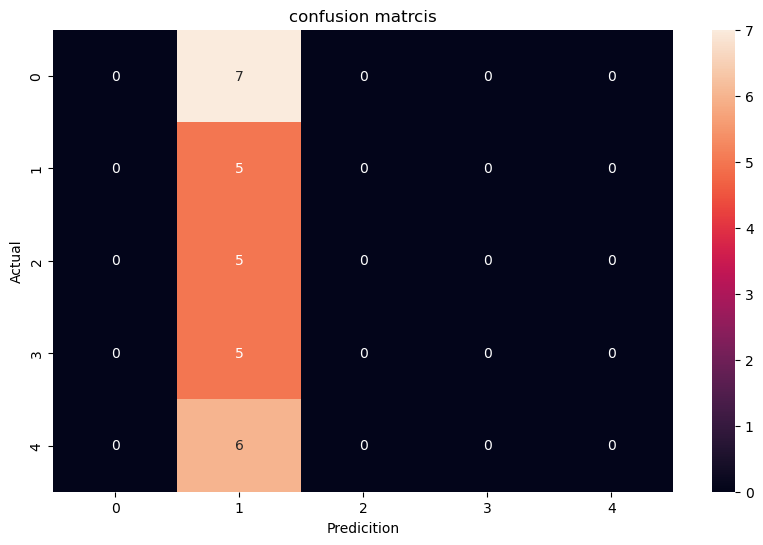

In [ ]:

print(classification_report(y_train_gan, pred_train_p2))
cm = confusion_matrix(y_train_gan , pred_train_p2)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrcis")
plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.11      1.00      0.19         3
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         5

    accuracy                           0.11        28
   macro avg       0.02      0.20      0.04        28
weighted avg       0.01      0.11      0.02        28



F:\New folder (3)\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\New folder (3)\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\New folder (3)\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


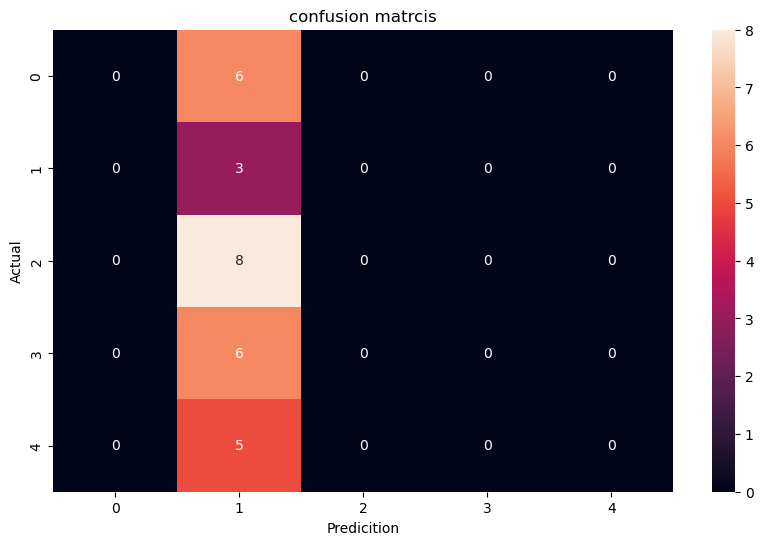

In [ ]:
print(classification_report(y_val_gan , pred_valid_p2))
cm = confusion_matrix(y_val_gan, pred_valid_p2)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrcis")
plt.show()

F:\New folder (3)\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\New folder (3)\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\New folder (3)\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\New folder (3)\lib\site-packages\sklearn\metrics\_classification.py:1334: Undefin

              precision    recall  f1-score   support

          -9       0.00      0.00      0.00         0
          -8       0.00      0.00      0.00         0
          -7       0.00      0.00      0.00         0
          -6       0.00      0.00      0.00         0
          -5       0.00      0.00      0.00         0
          -4       0.00      0.00      0.00         0
          -3       0.00      0.00      0.00         0
          -2       0.00      0.00      0.00         0
          -1       0.00      0.00      0.00         0
           0       0.07      0.05      0.06        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20

    accuracy                           0.01       100
   macro avg       0.00      0.00      0.00       100
weighted avg       0.01      0.01      0.01       100



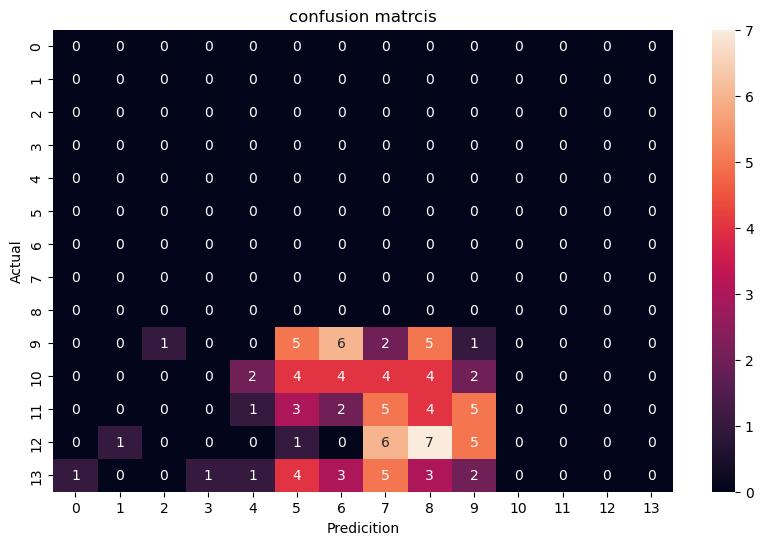

In [ ]:

print(classification_report(y_test  , pred_test_p2))
cm = confusion_matrix(y_test  , pred_test_p2)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrcis")
plt.show()

In [ ]:
# Write your code here

## Discussion

using data augmentaion as s=a step for improving the performance .
generate new data from original training data .
test the performace of data augmentation with classification and regression.

`part1:`
```
for training the model achive accuracy score 25% but by looking
 for the classification report the model just predicit the class0 
 only with recall = 100% and f-score = 40%
```
```
for validation the model achive accuracy score 21% but by looking for
 the classification report the model just predicit the class0 only with
  recall = 100% and f-score = 35%
```
```
for testing the model can achive accuracy score 17% but it can detect 
all classes and the class that it can detect it was calss  1 with 
recall = 60% and f-score = 27%
```

`part2:`
```
for training the model achive accuracy score 18% with mean square error = 1.68
```
```
for validation the model achive accuracy score 11% with mean square error = 1.64
```
```
for testing the model can achive accuracy score 1% with mean square error = 5.30
```

using data augmentaion with this dataset isn't better choise.

## References
[1] N. Teimouri, M. Dyrmann, P. R. Nielsen, S. K. Mathiassen, G. J. Somerville, and R. N. Jørgensen, “Weed growth stage estimator using deep convolutional neural networks,” Sensors, vol. 18, no. 5, 2018.